In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
df=pd.read_csv("tandrara_wind.csv")
df.head()

,YEAR,MO,DY,T2M_MAX,WS10M,WS50M
0,2001,12,1,17.38,2.16,3.02
1,2001,12,2,17.92,2.73,3.84
2,2001,12,3,15.80,2.37,3.24
3,2001,12,4,15.97,1.65,2.39
4,2001,12,5,17.43,2.34,3.33


In [53]:
#!pip install statsmodels
#!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 2.6 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.8 MB 2.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.8 MB 2.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.8 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 1.0 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 1.0 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 1.0 MB/s eta 0:00:02
   -------------------------- ------------- 1.8/2.8 MB 915.5 kB/s eta 0:00:02
   -------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


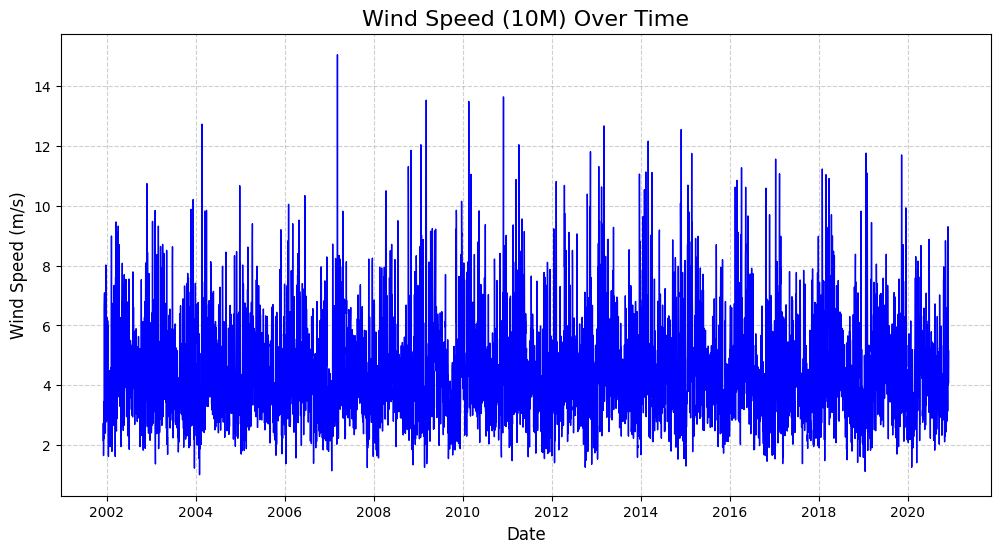

In [4]:
# Generate the x-axis labels using YEAR, MO, and DY as datetime objects
dates = pd.to_datetime(
    df['YEAR'].astype(str) + '-' + 
    df['MO'].astype(str).str.zfill(2) + '-' + 
    df['DY'].astype(str).str.zfill(2)
)

# Plot the WS10M values with generated dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(dates, df['WS10M'], linewidth=1, color='blue')
plt.title('Wind Speed (10M) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


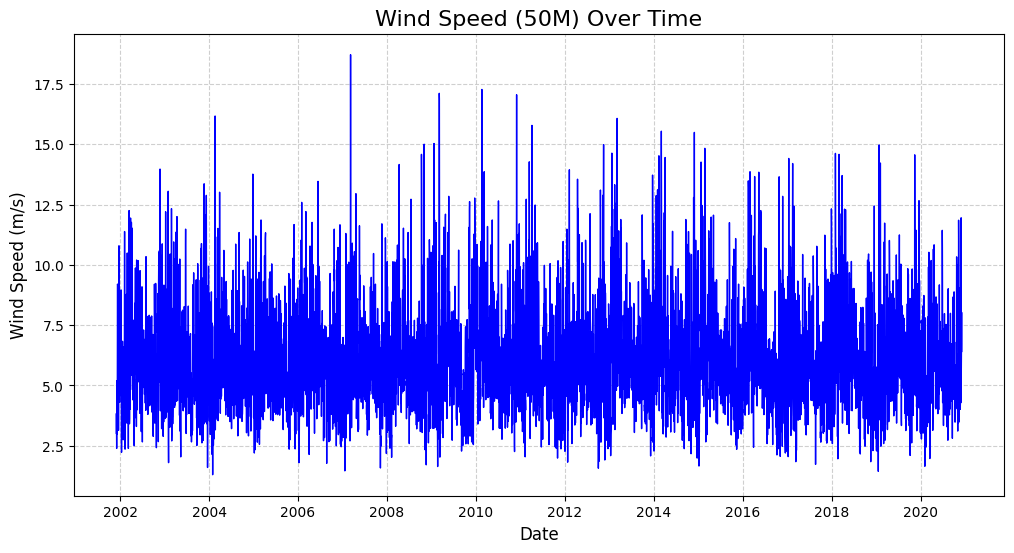

In [5]:
# Plot the WS10M values with generated dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(dates, df['WS50M'], linewidth=1, color='blue')
plt.title('Wind Speed (50M) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


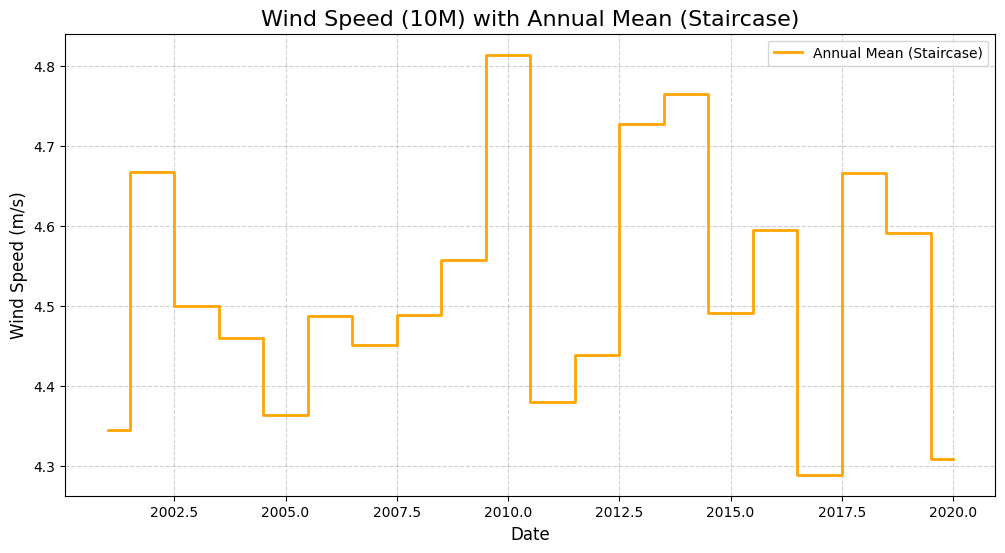

In [6]:
def calculate_annual_staircase(dataframe, value_column, year_column):
    """
    Calcule les moyennes annuelles et génère une liste en escalier pour un tracé.

    Args:
        dataframe (pd.DataFrame): Le DataFrame contenant les données.
        value_column (str): Le nom de la colonne contenant les valeurs (ex: 'WS10M').
        year_column (str): Le nom de la colonne contenant les années (ex: 'YEAR').

    Returns:
        pd.Series: Les moyennes annuelles indexées pour un tracé en escalier.
    """
    # Calculer les moyennes annuelles
    annual_mean = dataframe.groupby(year_column)[value_column].mean()
    
    # Créer une courbe en escalier pour chaque année
    staircase_values = annual_mean.reindex(
        range(dataframe[year_column].min(), dataframe[year_column].max() + 1),
        method='ffill'
    )
    
    return staircase_values

# Calculer les valeurs en escalier pour WS10M
staircase_ws10m = calculate_annual_staircase(df, value_column='WS10M', year_column='YEAR')

# Visualiser les résultats
plt.figure(figsize=(12, 6))

#  la courbe en escalier
plt.step(staircase_ws10m.index, staircase_ws10m, where='mid', color='orange', linewidth=2, label='Annual Mean (Staircase)')

# Ajustements
plt.title('Wind Speed (10M) with Annual Mean (Staircase)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()


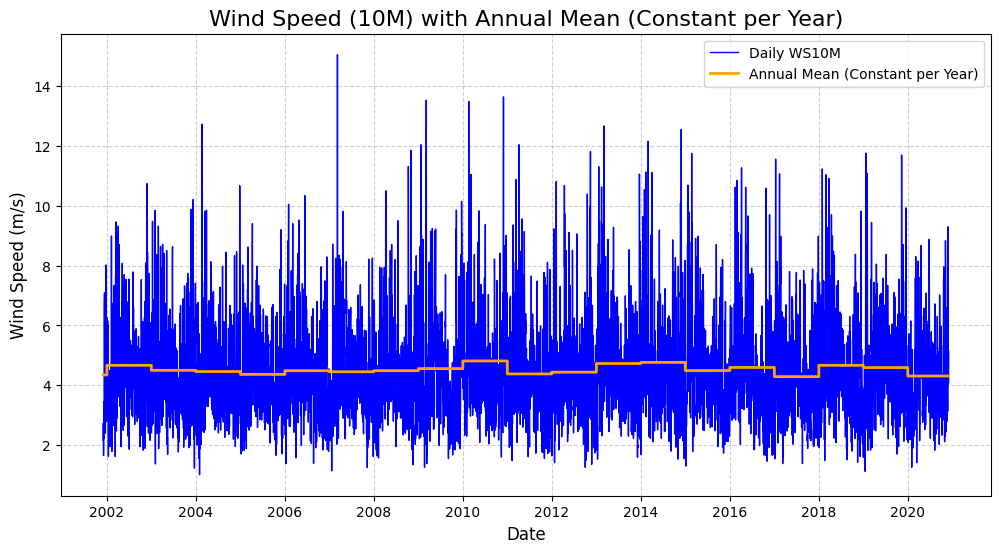

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Générer les dates pour l'axe des abscisses
dates = pd.to_datetime(
    df['YEAR'].astype(str) + '-' + 
    df['MO'].astype(str).str.zfill(2) + '-' + 
    df['DY'].astype(str).str.zfill(2)
)

# Vérifier les données pour les valeurs WS10M élevées ou aberrantes
# Pas nécessaire dans la visualisation mais utile pour déboguer
# print(df.describe())

# Calculer la moyenne annuelle précise
annual_mean = df.groupby('YEAR')['WS10M'].mean()

# Étendre cette moyenne annuelle à toutes les lignes de la même année
df['Annual_Mean'] = df['YEAR'].map(annual_mean)

# Créer le graphique
plt.figure(figsize=(12, 6))

# Courbe brute (daily WS10M)
plt.plot(dates, df['WS10M'], linewidth=1, color='blue', label='Daily WS10M')

# Courbe en escalier (annual mean applied throughout the year)
plt.step(dates, df['Annual_Mean'], where='mid', color='orange', linewidth=2, label='Annual Mean (Constant per Year)')

# Ajouter des détails
plt.title('Wind Speed (10M) with Annual Mean (Constant per Year)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Afficher le graphique
plt.show()


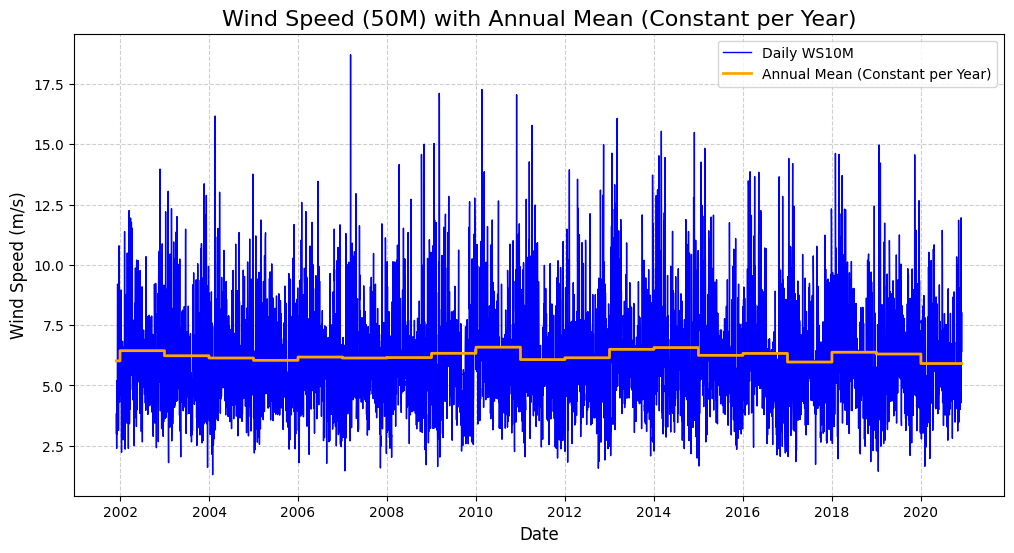

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Générer les dates pour l'axe des abscisses
dates = pd.to_datetime(
    df['YEAR'].astype(str) + '-' + 
    df['MO'].astype(str).str.zfill(2) + '-' + 
    df['DY'].astype(str).str.zfill(2)
)

# Vérifier les données pour les valeurs WS10M élevées ou aberrantes
# Pas nécessaire dans la visualisation mais utile pour déboguer
# print(df.describe())

# Calculer la moyenne annuelle précise
annual_mean = df.groupby('YEAR')['WS50M'].mean()

# Étendre cette moyenne annuelle à toutes les lignes de la même année
df['Annual_Mean'] = df['YEAR'].map(annual_mean)

# Créer le graphique
plt.figure(figsize=(12, 6))

# Courbe brute (daily WS10M)
plt.plot(dates, df['WS50M'], linewidth=1, color='blue', label='Daily WS10M')

# Courbe en escalier (annual mean applied throughout the year)
plt.step(dates, df['Annual_Mean'], where='mid', color='orange', linewidth=2, label='Annual Mean (Constant per Year)')

# Ajouter des détails
plt.title('Wind Speed (50M) with Annual Mean (Constant per Year)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Afficher le graphique
plt.show()


In [9]:
df['DATE']=dates 
df['Annual_Mean10M']=df['Annual_Mean']
df.drop('Annual_Mean', axis=1, inplace=True)

print(df)

      YEAR  MO  DY  T2M_MAX  WS10M  WS50M       DATE  Annual_Mean10M
0     2001  12   1    17.38   2.16   3.02 2001-12-01        6.018710
1     2001  12   2    17.92   2.73   3.84 2001-12-02        6.018710
2     2001  12   3    15.80   2.37   3.24 2001-12-03        6.018710
3     2001  12   4    15.97   1.65   2.39 2001-12-04        6.018710
4     2001  12   5    17.43   2.34   3.33 2001-12-05        6.018710
...    ...  ..  ..      ...    ...    ...        ...             ...
6936  2020  11  27     7.24   4.01   5.44 2020-11-27        5.909345
6937  2020  11  28    11.63   4.01   5.92 2020-11-28        5.909345
6938  2020  11  29    14.20   4.46   6.72 2020-11-29        5.909345
6939  2020  11  30    13.49   5.17   8.03 2020-11-30        5.909345
6940  2020  12   1    15.49   4.09   6.41 2020-12-01        5.909345

[6941 rows x 8 columns]


In [10]:
# Extraire uniquement la colonne WS10M
series = df['WS10M']

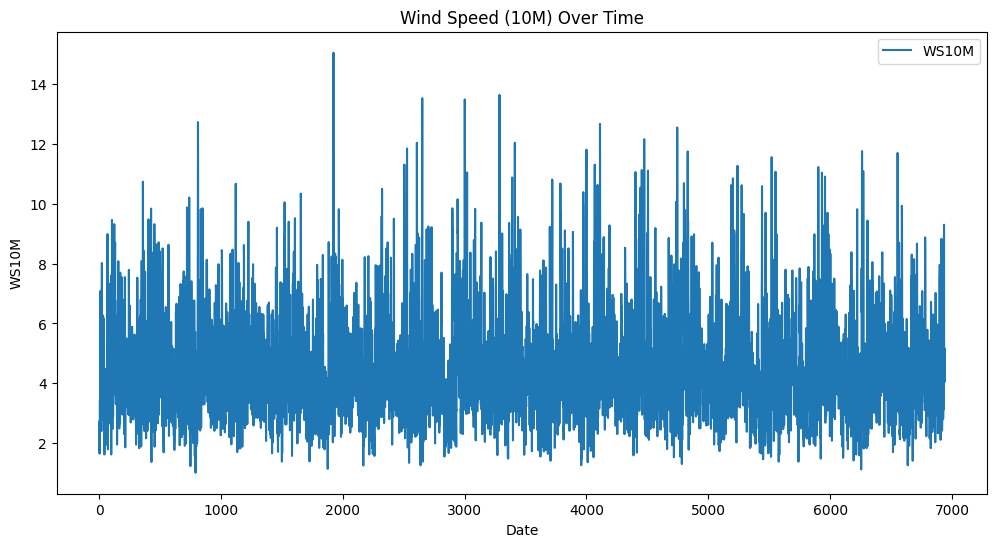

In [11]:
# Visualiser les données pour détecter les tendances ou saisonnalités
plt.figure(figsize=(12, 6))
plt.plot(series, label='WS10M')
plt.title('Wind Speed (10M) Over Time')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()


In [12]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(series)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

#p etant superieur à 0.05 indique que la serie n'est pas stationnare , 
#nous devons la rendre stationnaire en eliminant les tendances et saisonnalités
#en appliquant une differenciation 

ADF Statistic: -13.77376203805552
p-value: 9.574741489683215e-26


In [14]:
from pmdarima import auto_arima

# Identifier les paramètres optimaux
model_auto = auto_arima(series, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(model_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=7.34 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=26925.276, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=25006.724, Time=5.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=25220.257, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=41565.073, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=25011.588, Time=0.22 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=25007.333, Time=7.64 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=25006.918, Time=1.17 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=10.37 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=26907.895, Time=1.43 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=24992.202, Time=2.38 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=24997.473, Time=0.24 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=24992.683, Time=10.68 sec
 ARIMA(2,0,0)(1,0,1)[